In [1]:
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
with open('../law_results.pkl', 'rb') as f:
    law = pickle.load(f)
    
with open('../adult_results.pkl', 'rb') as f:
    adult = pickle.load(f)

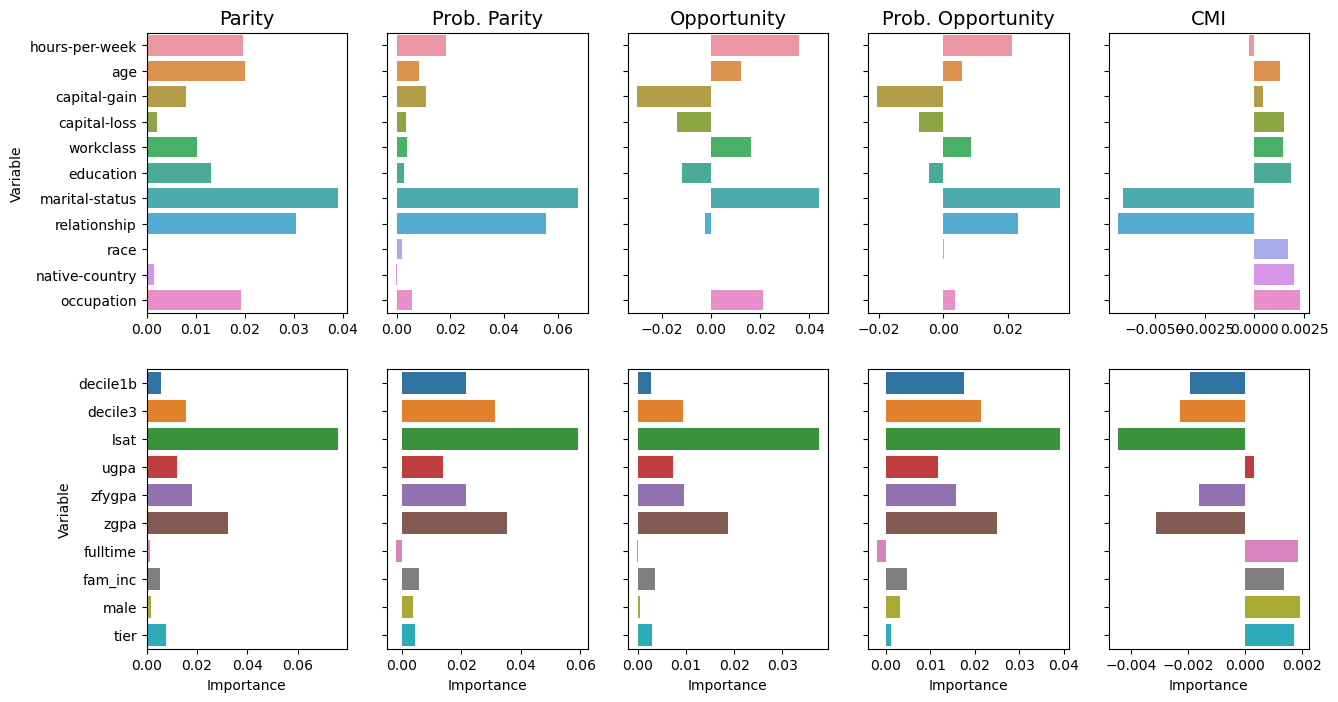

In [3]:
metrics = law['importance'].keys()
titles = ['Parity', 'Prob. Parity', 'Opportunity', 'Prob. Opportunity', 'CMI']
fig, axs = plt.subplots(2,5)
sns.set_context('paper')
fig.set_figwidth(15)
fig.set_figheight(8)

for i in range(len(metrics)):
    m = list(metrics)[i]
    law_res = law['importance'][m][0]
    adult_res = adult['importance'][m][0]
    
    law_df = pd.DataFrame({
        'Variable' : law_res.keys(),
        'Importance' : law_res.values()
    })
    adult_df = pd.DataFrame({
        'Variable' : adult_res.keys(),
        'Importance' : adult_res.values()
    })
    
    sns.barplot(law_df, y='Variable', x='Importance', ax=axs[1,i])
    sns.barplot(adult_df, y='Variable', x='Importance', ax=axs[0,i])
    axs[0,i].set_title(titles[i], fontsize=14)
    axs[0,i].set_xlabel('')
    if (i >= 1):
        axs[0,i].get_yaxis().set_ticklabels([])
        axs[1,i].get_yaxis().set_ticklabels([])
        axs[0,i].set_ylabel('')
        axs[1,i].set_ylabel('')

In [4]:
law['inference']

{'parity': (0.19785220429836828, (0.14501944430282535, 0.2506849642939112)),
 'prob_parity': (0.190831593618776,
  (0.14216264089387604, 0.23950054634367596)),
 'opportunity': (0.08363205589273767,
  (0.010523008947002463, 0.15674110283847287)),
 'prob_opp': (0.11591491185632942,
  (0.057296435504166694, 0.17453338820849215)),
 'cmi': (-0.006277131244492698,
  (-0.00911885387374438, -0.0034354086152410157))}

In [5]:
adult['inference']

{'parity': (0.17379785432707062, (0.16347817057847508, 0.18411753807566617)),
 'prob_parity': (0.17987002354684548,
  (0.1685661600546262, 0.19117388703906474)),
 'opportunity': (0.11405155790114678,
  (-0.13379701636741564, 0.36190013216970923)),
 'prob_opp': (0.08703268169453009, (0.03263614741386459, 0.1414292159751956)),
 'cmi': (-0.00183292961680728,
  (-0.002984229870153585, -0.0006816293634609749))}